In [1]:
# import all libraries
import pandas as pd
import joblib
import pickle
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
import matplotlib as plt
from xgboost import plot_importance
import matplotlib.pyplot as plt
import statistics as stats
import numpy as np

In [2]:
# Path settings


path_var = 1 

if (path_var == 1):
    filepath = '/home/docboy/Desktop/Option_Pricing/datasets/'
    modelpath = '/home/docboy/Desktop/Option_Pricing/pickles/'


else:
    filepath = '/home/sharan/Desktop/Option_Pricing/datasets/'
    mdoelpath = '/home/sharan/Desktop/Option_Pricing/pickles/'



rel = filepath + 'REL_feature_set_COV_complete.csv'
rel_ecdf = filepath + 'REL_feature_set_ECDF_complete.csv'
    
# sbin = filepath + 'SBIN_feature_set_COV_complete.csv'
# sbin_ecdf = filepath + 'SBIN_feature_set_ECDF_complete.csv'


In [3]:
# Set the automated variables + Plus drop all useless columns approach specific


###########################
###############################################

approach = 1                      #------------------>>> # Change value as needed

###############################################
###########################


if (approach == 1):
    feats = pd.read_csv(rel_ecdf)
    print ('Approach var set to ECDF')
    
    dropNames = ['date', 'percentage','strike','spot','opPrice']
    
#     b_feats = pd.read_csv(sbin_ecdf)
    
else:
    feats = pd.read_csv(rel)
    print ('Approach var set to :: '+ str(approach))
    
#     b_feats = pd.read_csv(bnfty)
    
    if (approach == 2):
        dropNames= ['date', 'percentage','strike','spot','opPrice','change_oi','ts_atr','prevOp','avg_atmError']
        
    else:
        dropNames= ['date', 'percentage','strike','spot','opPrice','ts_atr','change_oi']
        
###################

X=feats.iloc[:,:-1]
Y=feats.loc[:,'Target']
X = X.drop(dropNames, axis = 1)    



# b_X = b_feats.iloc[:,:-1]
# b_Y = b_feats.loc[:,'Target']
# b_X = b_X.drop(dropNames, axis = 1)    




Approach var set to ECDF


In [4]:
X.columns

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'ttm',
       'atmError', 'yield03'],
      dtype='object')

In [5]:
# Start the scaling process

featNames = list(X)  
scaler = RobustScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = featNames)


In [12]:
# # Save the scalar file

joblib.dump(scaler, modelpath + 'SCALER_REL_Expt' + str(approach) + '.model')
print("Scaler saved to path ::", modelpath + 'SCALER_REL_Expt' + str(approach) + '.model')

Scaler saved to path :: /home/docboy/Desktop/Option_Pricing/pickles/SCALER_REL_Expt1.model


In [7]:
# Split the train and test sets without random optimizations


a = len(feats)
split_val = round(a*0.8)

# Removing the Random splits

X_train = X.iloc[0:split_val, :]
X_test = X.iloc[split_val:, :]
Y_train = Y.iloc[:split_val]
Y_test = Y.iloc[split_val:]
print ('X & Y_Dim of Train is', X_train.shape, Y_train.shape)
print ('X & Y_Dim of Test is', X_test.shape, Y_test.shape)

Y_test=Y_test.values
Y_train=Y_train.values



X & Y_Dim of Train is (4543, 22) (4543,)
X & Y_Dim of Test is (1136, 22) (1136,)


In [8]:
# param =
model = XGBClassifier(n_estimators = 150, max_depth = 4, learning_rate = 0.15 , n_jobs=4)
%time model.fit(X_train, Y_train)
print(model)



CPU times: user 1min 7s, sys: 412 ms, total: 1min 7s
Wall time: 19.4 s
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=4,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [9]:
k = model.predict(X_test)

In [10]:
# Normalized Error Metric (NEM)

bin_width = 0.1    # Note the uniform binning!!!!!!!!
dist_sum = 0
for i in range(len(k)):
    dist = abs(k[i] - Y_test[i])
    dist_sum = dist_sum + dist
    
print("NEM :: ", (dist_sum*bin_width)/len(Y_test))

NEM ::  0.3342429577464789


In [11]:
accuracy_score(Y_test, k)*100
# print(classification_report(Y_test, k))

17.693661971830984

In [38]:
# Saving the model
joblib.dump(model, modelpath + 'REL_Expt' + str(approach) + '.model')
print("Model saved to path ::", modelpath + 'REL_Expt_NEW' + str(approach) + '.model' )

Model saved to path :: /home/docboy/Desktop/Option_Pricing/pickles/NIFTY50_Expt_NEW1.model


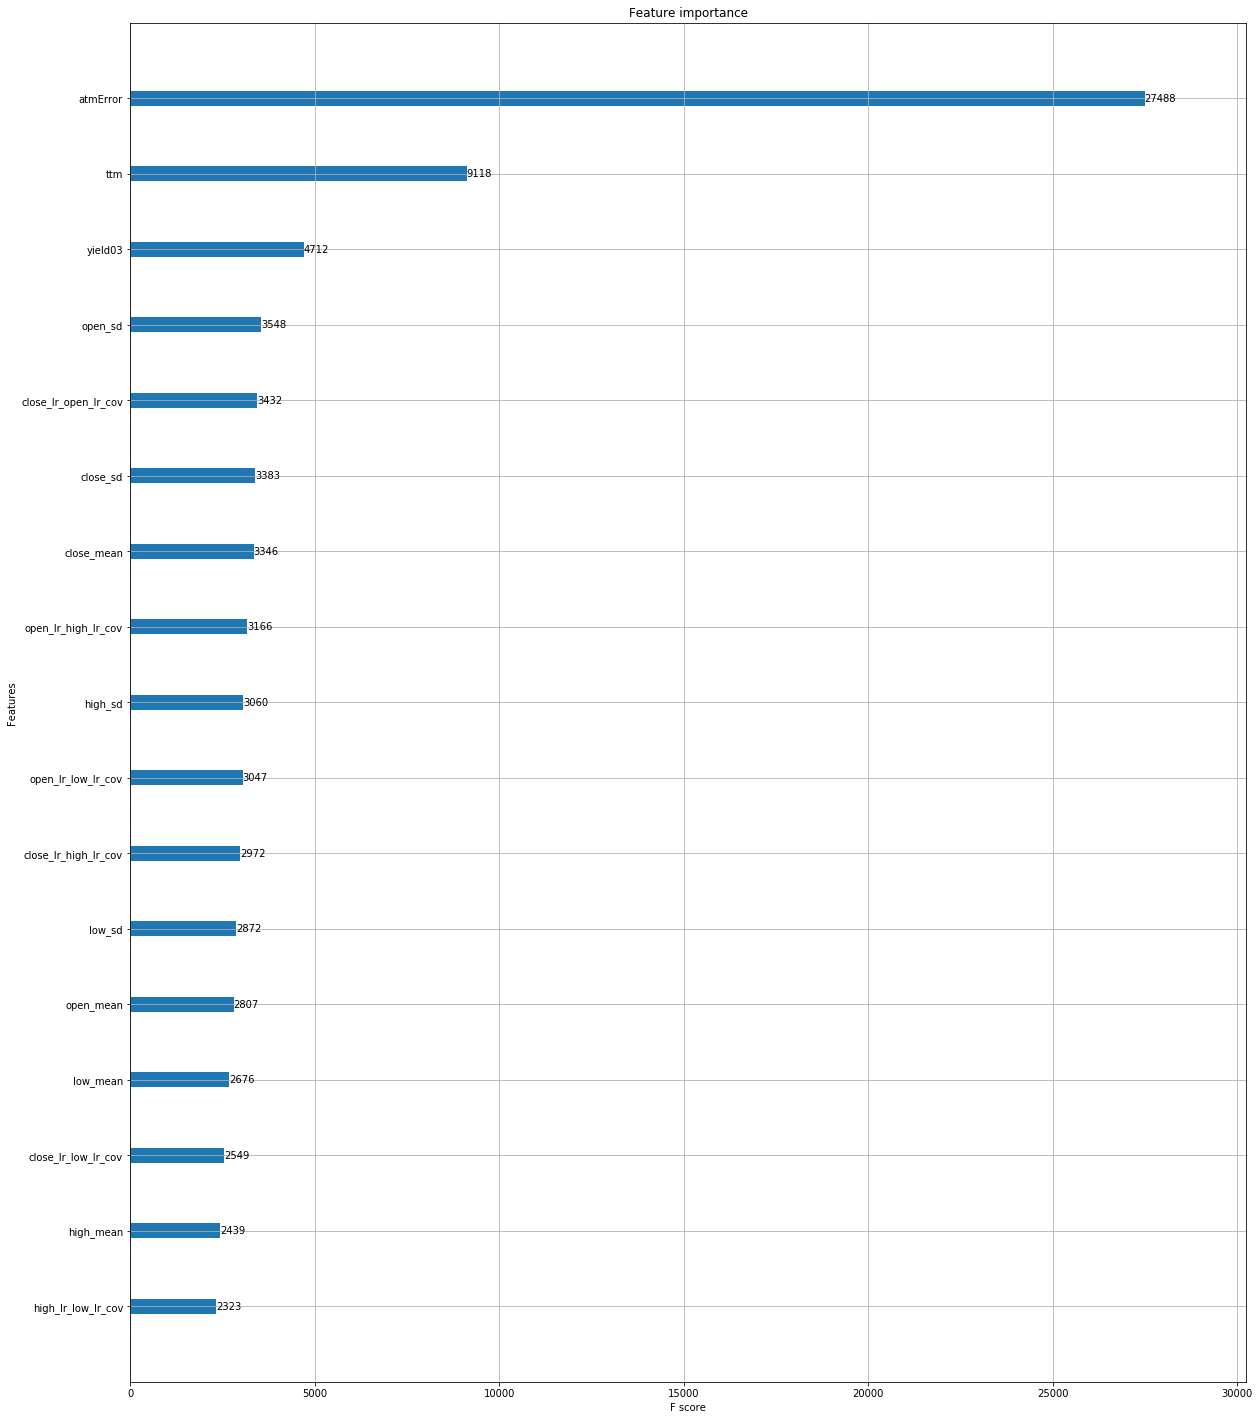

In [13]:
plt.rcParams['figure.figsize'] = [20, 25]
plot_importance(model)
plt.show()

# Port Part

In [14]:
# ### Begin Port Part

# # Scale the dataset according to saved scaler

# featNames = list(b_X)
# b_X = scaler.transform(b_X)
# b_X = pd.DataFrame(b_X, columns = featNames)


# # Split the dataset


# b_X_test = b_X.iloc[:, :]
# b_Y_test = b_Y.iloc[:]
# print ('b_X & b_Y_Dim of Test is', b_X_test.shape, b_Y_test.shape)

# b_Y_test = b_Y_test.values

In [15]:
# pred = model.predict(b_X_test)

In [16]:
# dist_sum = 0
# for i in range(len(pred)):
#     dist = abs(pred[i] - b_Y_test[i])
#     dist_sum = dist_sum + dist
    
# print("NEM ::", (dist_sum*bin_width)/len(b_Y_test))

path="/home/sharan/Desktop/Option Pricing Work/Work/Serial GBM Runs/"
X_NEM = []
X_D_NEM = []
sigma = np.linspace(0.01, 0.2, 20)


for si in sigma:
    si=round(si,2)
    feats = pd.read_csv(path+"GBM_feature_set_final_ecdf_"+str(si)+".csv")
    X=feats.iloc[:,:-1]
    X['atmError']=X['atmError']*100
    Y=feats.loc[:,'Target']
    dr = ['percentage']
    X = X.drop(dr, axis = 1)
    featNames=list(X)    
    X = scaler.transform(X)
    X = pd.DataFrame(X, columns=featNames)
    
    Y = Y.values
    
    Y_pred = model.predict(X)
    
    dist_sum = 0
    d_dist_sum = 0
    for i in range(len(Y_pred)):
        dist = abs(Y_pred[i] - Y[i]) # NEM
        d_dist = (Y_pred[i] - Y[i]) # Directional NEM (NEM without the mod)
        
        dist_sum = dist_sum + dist # NEM
        d_dist_sum = d_dist_sum + d_dist
    
    nem = (dist_sum*bin_width)/len(Y)*100
    d_nem = (d_dist_sum*bin_width)/len(Y)*100
    
    X_NEM.append(nem)
    X_D_NEM.append(d_nem)

xresults=pd.DataFrame({'sigma' : sigma, 
              'nem': X_NEM, 
              'd_nem' : X_D_NEM})
xresults.to_csv(path+"XresultsGBM.csv" ,index=False)

path="/home/sharan/Desktop/Option Pricing Work/Work/Serial GBM Runs/"
X_NEM = []
X_D_NEM = []
sigma = np.linspace(0.01, 0.2, 20)


for si in sigma:
    si=round(si,2)
    feats = pd.read_csv(path+"GBM_feature_set_final_ecdf_"+str(si)+".csv")
    X=feats.iloc[:,:-1]
    X['atmError']=X['atmError']*100
    Y=feats.loc[:,'Target']
    dr = ['percentage']
    X = X.drop(dr, axis = 1)
    featNames=list(X)    
    X = scaler.transform(X)
    X = pd.DataFrame(X, columns=featNames)
    
    Y = Y.values
    
    Y_pred = model.predict(X)
    
    dist_sum = 0
    d_dist_sum = 0
    for i in range(len(Y_pred)):
        dist = abs(Y_pred[i] - Y[i]) # NEM
        d_dist = (Y_pred[i] - Y[i]) # Directional NEM (NEM without the mod)
        
        dist_sum = dist_sum + dist # NEM
        d_dist_sum = d_dist_sum + d_dist
    
    nem = (dist_sum*bin_width)/len(Y)*100
    d_nem = (d_dist_sum*bin_width)/len(Y)*100
    
    X_NEM.append(nem)
    X_D_NEM.append(d_nem)

xresults=pd.DataFrame({'sigma' : sigma, 
              'nem': X_NEM, 
              'd_nem' : X_D_NEM})
xresults.to_csv(path+"XresultsGBM.csv" ,index=False)

path="/home/sharan/Desktop/Option Pricing Work/Work/Binomial/"

U=[]
D=[]
for i in range(1,10):
    u=1+(i*pow(10,-3))
    d=1/u
    U.append(u)
    D.append(d)

X_NEM = []
X_D_NEM = []

for u in U:
    u=round(u,5)
    feats = pd.read_csv(path+"BM_feature_set_final_ecdf_"+str(u)+".csv")
    X=feats.iloc[:,:-1]
    X['atmError']=X['atmError']*100
    Y=feats.loc[:,'Target']
    dr = ['percentage']
    X = X.drop(dr, axis = 1)
    featNames=list(X)    
    X = scaler.transform(X)
    X = pd.DataFrame(X, columns=featNames)
   
    Y=Y.values
    
    k = model.predict(X)
    dist_sum = 0
    d_dist_sum = 0
    for i in range(len(k)):
        dist = abs(k[i] - Y[i]) # NEM
        d_dist = (k[i] - Y[i]) # Directional NEM (NEM without the mod)
        
        dist_sum = dist_sum + dist # NEM
        d_dist_sum = d_dist_sum + d_dist
    
    nem = (dist_sum*bin_width)/len(Y)*100
    d_nem = (d_dist_sum*bin_width)/len(Y)*100
    
    X_NEM.append(nem)
    X_D_NEM.append(d_nem)

xresults=pd.DataFrame({'U' : U, 
              'nem': X_NEM, 
              'd_nem' : X_D_NEM})
xresults.to_csv(path+"XresultsBM.csv" ,index=False)